# Small Day Workshop on Time Series - Introduction (max 45 min lecture)

Basic introduction to Time Series and various models for forecasting with Python.

PD Dr. Sigve Haug, 2023.


This work is licensed under <a href="https://creativecommons.org/share-your-work/public-domain/cc0/">CC0</a>.

Resources : [sktime project webpage](https://www.turing.ac.uk/research/research-projects/sktime-toolbox-data-science-time-series). [sktime github repository](https://github.com/sktime/sktime?ref=timescale.com). [sktime Tutorial on Forecasting](https://github.com/sktime/sktime-tutorial-europython-2023/blob/main/notebooks/03_forecasting.ipynb).[Time Series Tutorial with Tensorflow](https://colab.research.google.com/drive/163hxF_dhAc0-9JL8VsXAfEiBiMyehwSj?usp=sharing)

# Workshop Structure

- Introduction to Time Series (this lecture) - 45 min
- Basic tutorial - 45 min
- sktime tutorial on forecasting - 90 min
- TensorFlow tutorial - 120 min or more

If you finish early, you can work on your project with own data using the sktime or the TensorFlow tutorial - 30 hours per person (work in teams)

# Lecture Outline

- Motivation
- Data and Time Series (TS) Data
- Consequences for splitting and training
- Fourier Transformation
- Visualisation
- Components of TS
- Decomposition
- Autocorrelation and lag plots
- Stationary TS
- Smoothing
- Summary
- Terminology

# Motivation

Applications of time series are used for many tasks.
- Statistics
- Finance and business applications, e.g. the daily closing value of the stock index like SMI or Dow Jones.
- Sales and demand forecasting
- Weather forecasting
- Signal processing
- Earthquake prediction
- ...


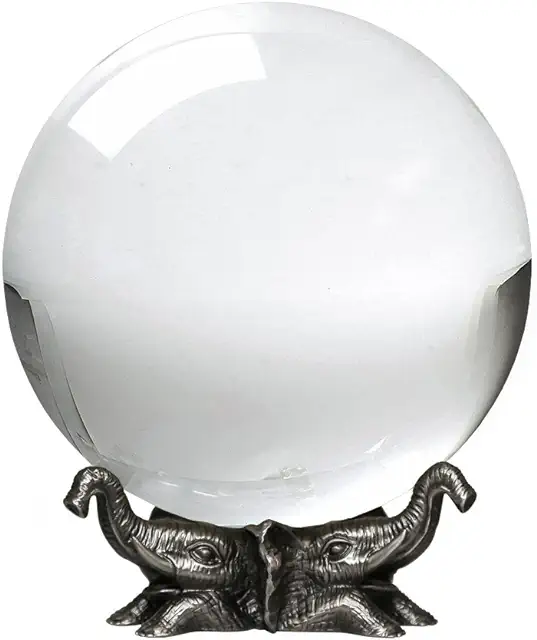


So, it is very much about having the crystal ball, predicting the future, do forecasting. Or short, many people want to become rich.

**Disclaimer :** Energy conservation demands, that if you get rich and you consume real goods more than you can produce yourself, you have most probably become a thief.

# Data and Time Series Data

By data we understand any collection of symbols. By symbols we understand elements y of a codomain Y which represents elements x in the domain X of a function, also called map.

$$ f:X \rightarrow Y $$

This way, data represents something. We don't think there is something that is not data. It follows that the function, which we in machine learning call the model, should be surjective and not injective.


**Examples**

- Natural numbers {0,1,2,...}
- Real numbers
- Set of images
- Video
- Sensor data, typically a sequence of voltage magnitudes
- Natural language

**Order and Time Series Data (TSD)**

Some of the examples above have ordered elements, others not. Which ? TSD data are ordered, in time. All elements preceeds or succeeds, or both, another element by some rule. Such sets are called sequences. Order allows for causality in the data processing. Definite information speed, e.g. speed of light in vacuum, allows for cauality in reality.  

The usual implementation of TSD is the time stamp. The time of the data point, normally a row in a table, is added in an additional column, sometimes also as an index: ${x} \rightarrow {t,x}$. Commonly a fixed intervall between two stamps is used, i.e. TSD is for practical purposes discrete.

You may argue that all data have a time order, however, that becomes too philosophical for our purposes. Our approach is, that depending on the task, data order can be neglected when we deal with non TDS.

**Example**

Temperatures in cities. Source is
https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
#from io import StringIO

path = './drive/MyDrive/CAS/CAS-AML-2023/GlobalLandTemperaturesByCity.csv'
#path = 'https://drive.google.com/uc?export=download&id=1ujlBi-KehYqum8EsXPqMRQoemLhLsJma'
dataframe = pd.read_csv(path)
#dataframe.head()
dfB=dataframe[dataframe['City']=='Bern']
dfB

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
858581,1743-11-01,3.544,1.764,Bern,Switzerland,47.42N,8.29E
858582,1743-12-01,NaN,NaN,Bern,Switzerland,47.42N,8.29E
858583,1744-01-01,NaN,NaN,Bern,Switzerland,47.42N,8.29E
858584,1744-02-01,NaN,NaN,Bern,Switzerland,47.42N,8.29E
858585,1744-03-01,NaN,NaN,Bern,Switzerland,47.42N,8.29E
...,...,...,...,...,...,...,...
861815,2013-05-01,9.400,0.396,Bern,Switzerland,47.42N,8.29E
861816,2013-06-01,14.444,0.388,Bern,Switzerland,47.42N,8.29E
861817,2013-07-01,18.658,0.231,Bern,Switzerland,47.42N,8.29E
861818,2013-08-01,16.657,0.490,Bern,Switzerland,47.42N,8.29E


In [ ]:
# EXERCISE
# Average out seasonal effects by averaging over the year

# Convert the 'date' column to datetime format
dfB['dt'] = pd.to_datetime(dfB['dt'])

# Group the data by year
grouped = dfB.groupby(dfB['dt'].dt.year).mean()

# Reset index to make 'year' a column instead of an index
grouped = grouped.reset_index()

#print(grouped[100:110,:])
grouped.iloc[100:,:]

<ipython-input-40-12b864c93977>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfB['dt'] = pd.to_datetime(dfB['dt'])
<ipython-input-40-12b864c93977>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = dfB.groupby(dfB['dt'].dt.year).mean()


,dt,AverageTemperature,AverageTemperatureUncertainty
100,1843,6.615000,1.388333
101,1844,6.251333,1.227917
102,1845,5.854500,1.573167
103,1846,7.569667,1.649750
104,1847,6.116000,1.692000
...,...,...,...
266,2009,8.145250,0.242917
267,2010,7.064500,0.215167
268,2011,8.680417,0.295500
269,2012,7.956167,0.352417


<Axes: xlabel='dt'>

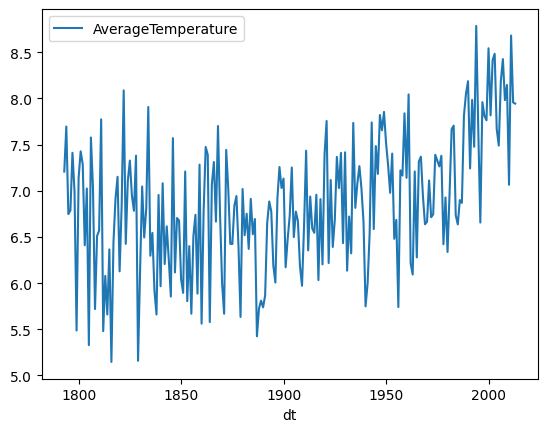

In [ ]:
grouped.iloc[50:,:].plot('dt','AverageTemperature')

In [ ]:
grouped.iloc[100:,1]

100    6.615000
101    6.251333
102    5.854500
103    7.569667
104    6.116000
         ...   
266    8.145250
267    7.064500
268    8.680417
269    7.956167
270    7.943625
Name: AverageTemperature, Length: 171, dtype: float64

# Consequences for Training an Splitting

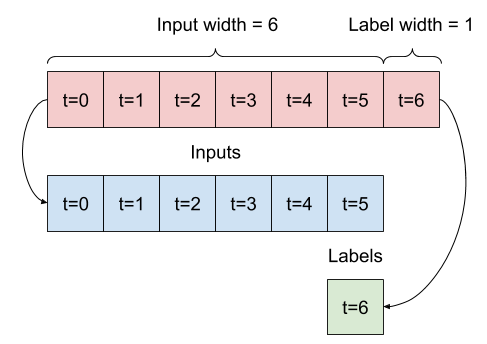


- Most probably you don't want to shuffle your data
- Most probably you want the most recent data to be validation and test data
- You need to think about how to window your data for training, i.e. decide on what is a data point (segmentation); a day, a week, a month, a year, or a decade etc

# Fourier Transformation

Sometimes you know the cycles or the periodicity of your data. For example daily, monthly and annual frequencies that are dictated by the physics of our solar system. Other times you don't. For example, are there frequencies in the tmeperature in the Bernese temperature more prominent than others?

A tool for finding such frequencies is the Fourier Transformation. It transforms your data from the time domain into the frequency domain, i.e. into the so called spectral density function. Read about it [here](https://en.wikipedia.org/wiki/Fourier_transform).

Practically, we use implementations (python methods) of the Fast Fourier Transformation: scipy.fft.

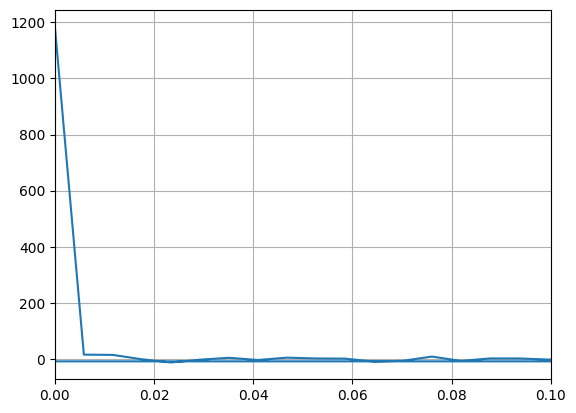

In [ ]:
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
n = grouped.iloc[100:,1].size
d = 1
yft = fft(grouped.iloc[100:,1].values)
xft = fftfreq(n,d)
plt.plot(xft, yft)
plt.xlim([0.,0.1])
plt.grid()
plt.show()

#Visualisation

TSD is normally visualized with time plots. Typically they are:
- time line plots
- seasonal (line) plots
- polar seasonal plots
- sesional subseries plots
- scatter plots (matrices) for correlations
- Lag plots for autocorrelation
- Autocorrelation function (ACF) plots

# Components of TS

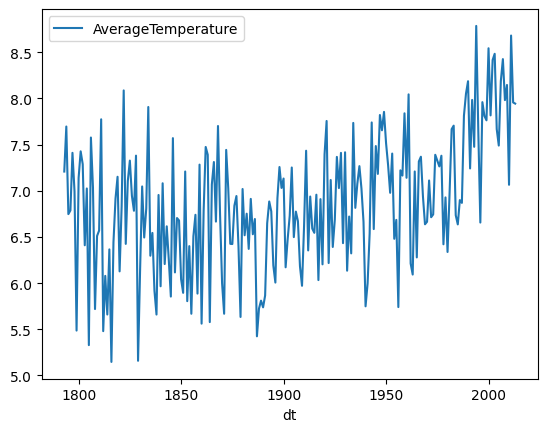

For common time series patterns, there are the terms, which may also be called differently:

**Level** - The level is the average value.

**Trend** - The trend shows a general direction of the time series data over a long period of time. A trend can be increasing (upward), decreasing (downward), or horizontal (stationary).

**Seasonality** - The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.

**Cyclical Component** - These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs. One example is booms and slums observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period depending on the nature of the time series.

**Irregular Variation** - These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random noise/error.

Which components do you see in the temparature plot example above?

ETS decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend and Seasonality.

# Decomposition, detrending and deseasonalizing

Decomposition of the signal is useful for understanding and modelling the data, for example for classical forecasting. With modern machine learning methods, the models learn the decomposition by themselves.  

There are of course many ways to decompose a signal, however, usually we decompose either additively or multiplicatively. The time series methods in for example statsmodels or sktime include decomposition methods.

- Addidative Time Series - Value = Base Level + Trend + Seasonality + Noise
- Multiplicative Time Series - Value = Base Level x Trend x Seasonality x Noise

We can plot the residuals after subtracting the components and decide on the preferred decomposition to use.

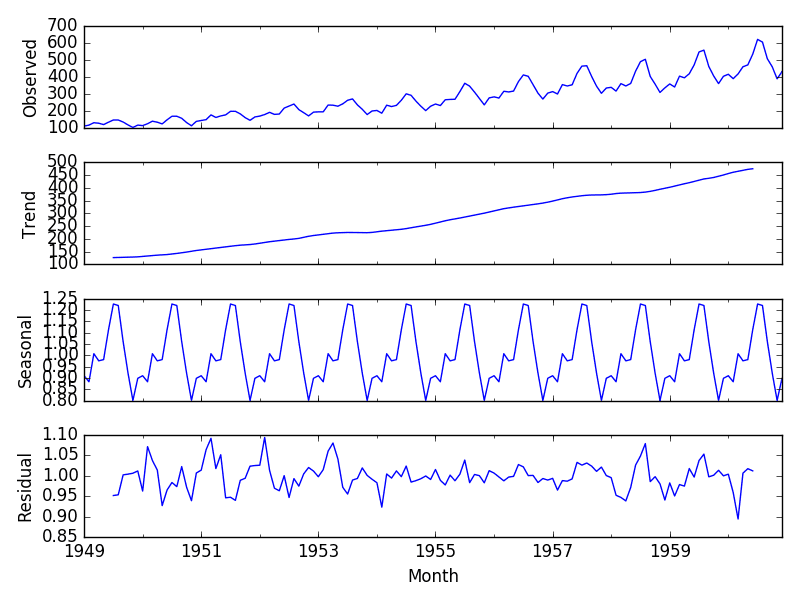

Now we can use curve fitting for making models of the various components.

There are Python modules for detrending and deseasonlizing time series. Some of these are shown in the tutorial.

# Autocorrelation and Lag Plots

- Autocorreation is the correlation of a feature's value with its previous values. One can visualize with scatter (lag) plots or the autocorrelation function.  

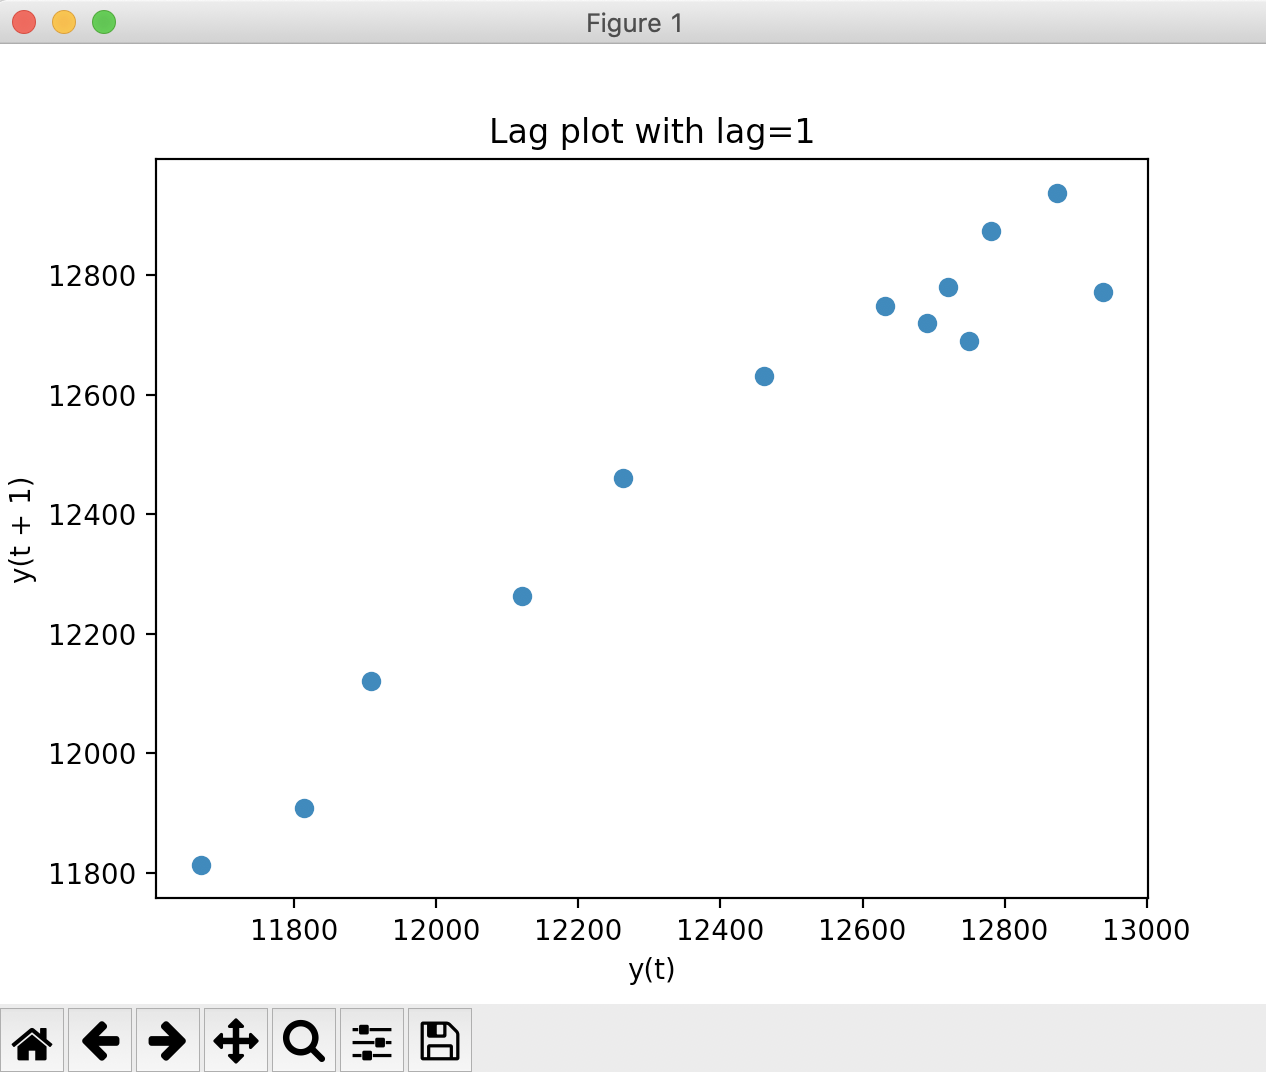

# Stationary Time Series

Most (classical) forecasting methods are using stationary time series. Thus, the pre-forecasting task may be to transform a non-stationary time series into a stationary one.

Stationarity can be inspected by eye, i.e. studing the plots, looking at the statistics in various time intervals or by applying test algorithms. Among the latter are:

- Augmented Dickey Fuller test (ADF Test)
- Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
- Philips Perron test (PP Test)

The transformations for reaching stationarity may include:

1. Differencing the Series (once or more)
2. Take the log of the series
3. Take the nth root of the series
4. Combination of the above

The most commonly used and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.

# Smoothening Time Series


Smoothening of a time series may be useful in the following circumstances:

- Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
- The smoothed version of series can be used as a feature to explain the original series itself.
- Visualize the underlying trend better

Smoothing distributions is a large topic with many algorithms. Some are easily at hand in the statsmodels. For example a moving average algorithm

# Summary

- To be written


# Further TS Terminology


There are various terms and concepts in time series that are good to know. Examples are:

- Dependence - It refers to the association of two observations of the same feature at prior time periods.

- Stationarity - When a feature (mean) does not change (much) over a time period.

- Differencing - Differencing is used to make the series stationary and to control the auto-correlations. There may be some cases in time series analyses where we do not require differencing and over-differenced series can produce wrong estimates.

- Specification - It may involve the testing of the linear or non-linear relationships of dependent variables by using time series models such as ARIMA models.

- Exponential Smoothing - Exponential smoothing in time series analysis predicts the one next period value based on the past and current value. It involves averaging of data such that the non-systematic components of each individual case or observation cancel out each other. The exponential smoothing method is used to predict the short term prediction.

- Curve fitting - Curve fitting regression in time series analysis is used when data is in a non-linear relationship.

- Moving average - The average of a rolling window of defined width. We must choose the window-width wisely, because, large window-size will over-smooth the series. For example, a window-size equal to the seasonal duration (ex: 12 for a month-wise series), will effectively nullify the seasonal effect.

- ARIMA - ARIMA stands for Auto Regressive Integrated Moving Average.

- White Noise - TS without any autocorrelation is called white noise (constant power spectrum density)

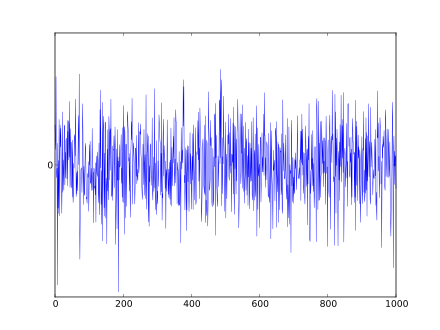